In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#uploading the file 
from google.colab import files

uploaded=files.upload()

Saving car.csv to car.csv


In [ ]:
#reading the file and showing first 5 column
df=pd.read_csv('car.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


calculating number of rows and columns


In [ ]:
df.shape

(301, 9)

checking weather data contains null values

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#we can see there are no null values in it

ploting graph of selling price vs time

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

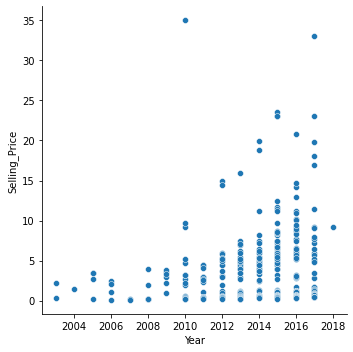

In [ ]:
graph=plt.figure(figsize=(20,20))
sns.relplot('Year','Selling_Price',data=df,kind='scatter')

looking into selling price data to see highest,lowest and mean value

In [ ]:
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

from above we can see  the minimum value for car price is 1 lacks and maximum value is 35 lacks

ploting the graph of selling price to see the distribution of the selling price

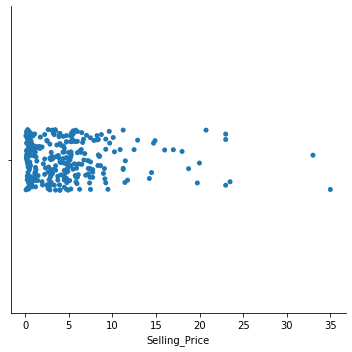

In [ ]:
sns.catplot(x='Selling_Price',data=df)

from above we can see most of the cars are priced at 1 lack

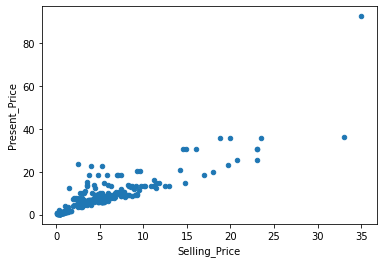

In [ ]:
# ploting graph between selling price and present price
df.plot.scatter(x='Selling_Price',y='Present_Price')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


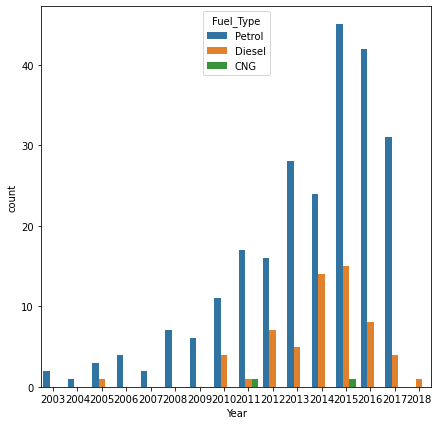

In [ ]:
plt.figure(figsize=(7,7))
sns.countplot('Year',hue="Fuel_Type",data=df)

from above countplot we can see there are maximum petrol cars after that disel and then cng cars

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 288x288 with 0 Axes>

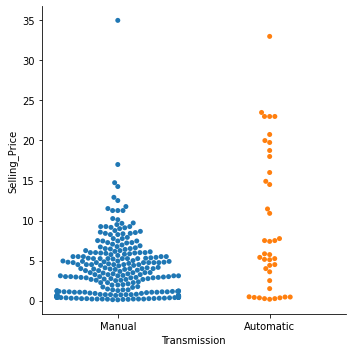

In [ ]:
#ploting the graph of transmission type and price
plt.figure(figsize=(4,4))
sns.catplot(data=df,kind='swarm',x='Transmission',y='Selling_Price',split=True)

checking if there is any relationship between km driven and selling price

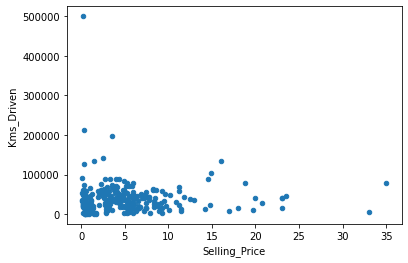

In [ ]:
df.plot.scatter('Selling_Price','Kms_Driven')

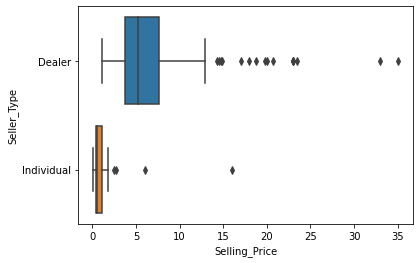

In [ ]:
#ploting boxplot for selling price and seller type
sns.boxplot(x='Selling_Price',y='Seller_Type',data=df)

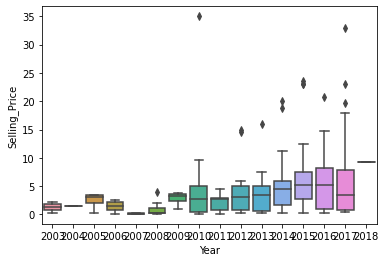

In [ ]:
#ploting year wise box plot
sns.boxplot(x='Year',y='Selling_Price',data=df)

In [ ]:
#car name column contains many unique values so it can be dropped
df.drop('Car_Name',axis=1,inplace=True)

In [ ]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#converting the column 0f year to number of years car is old
df['curr_Year']=2023
df['Years']=df.curr_Year-df.Year
df.drop(['Year','curr_Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,curr_Year=,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [ ]:
#observing how many categorical columns are there
cat_col=df.select_dtypes(include='object')
for i in cat_col:
  print('column name {}  {}:{}'.format(i,df[i].nunique(),df[i].unique()))

column name Fuel_Type  3:['Petrol' 'Diesel' 'CNG']
column name Seller_Type  2:['Dealer' 'Individual']
column name Transmission  2:['Manual' 'Automatic']


In [ ]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,curr_Year=,Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2023,9,0,1,0,1
1,4.75,9.54,43000,0,2023,10,1,0,0,1
2,7.25,9.85,6900,0,2023,6,0,1,0,1
3,2.85,4.15,5200,0,2023,12,0,1,0,1
4,4.60,6.87,42450,0,2023,9,1,0,0,1


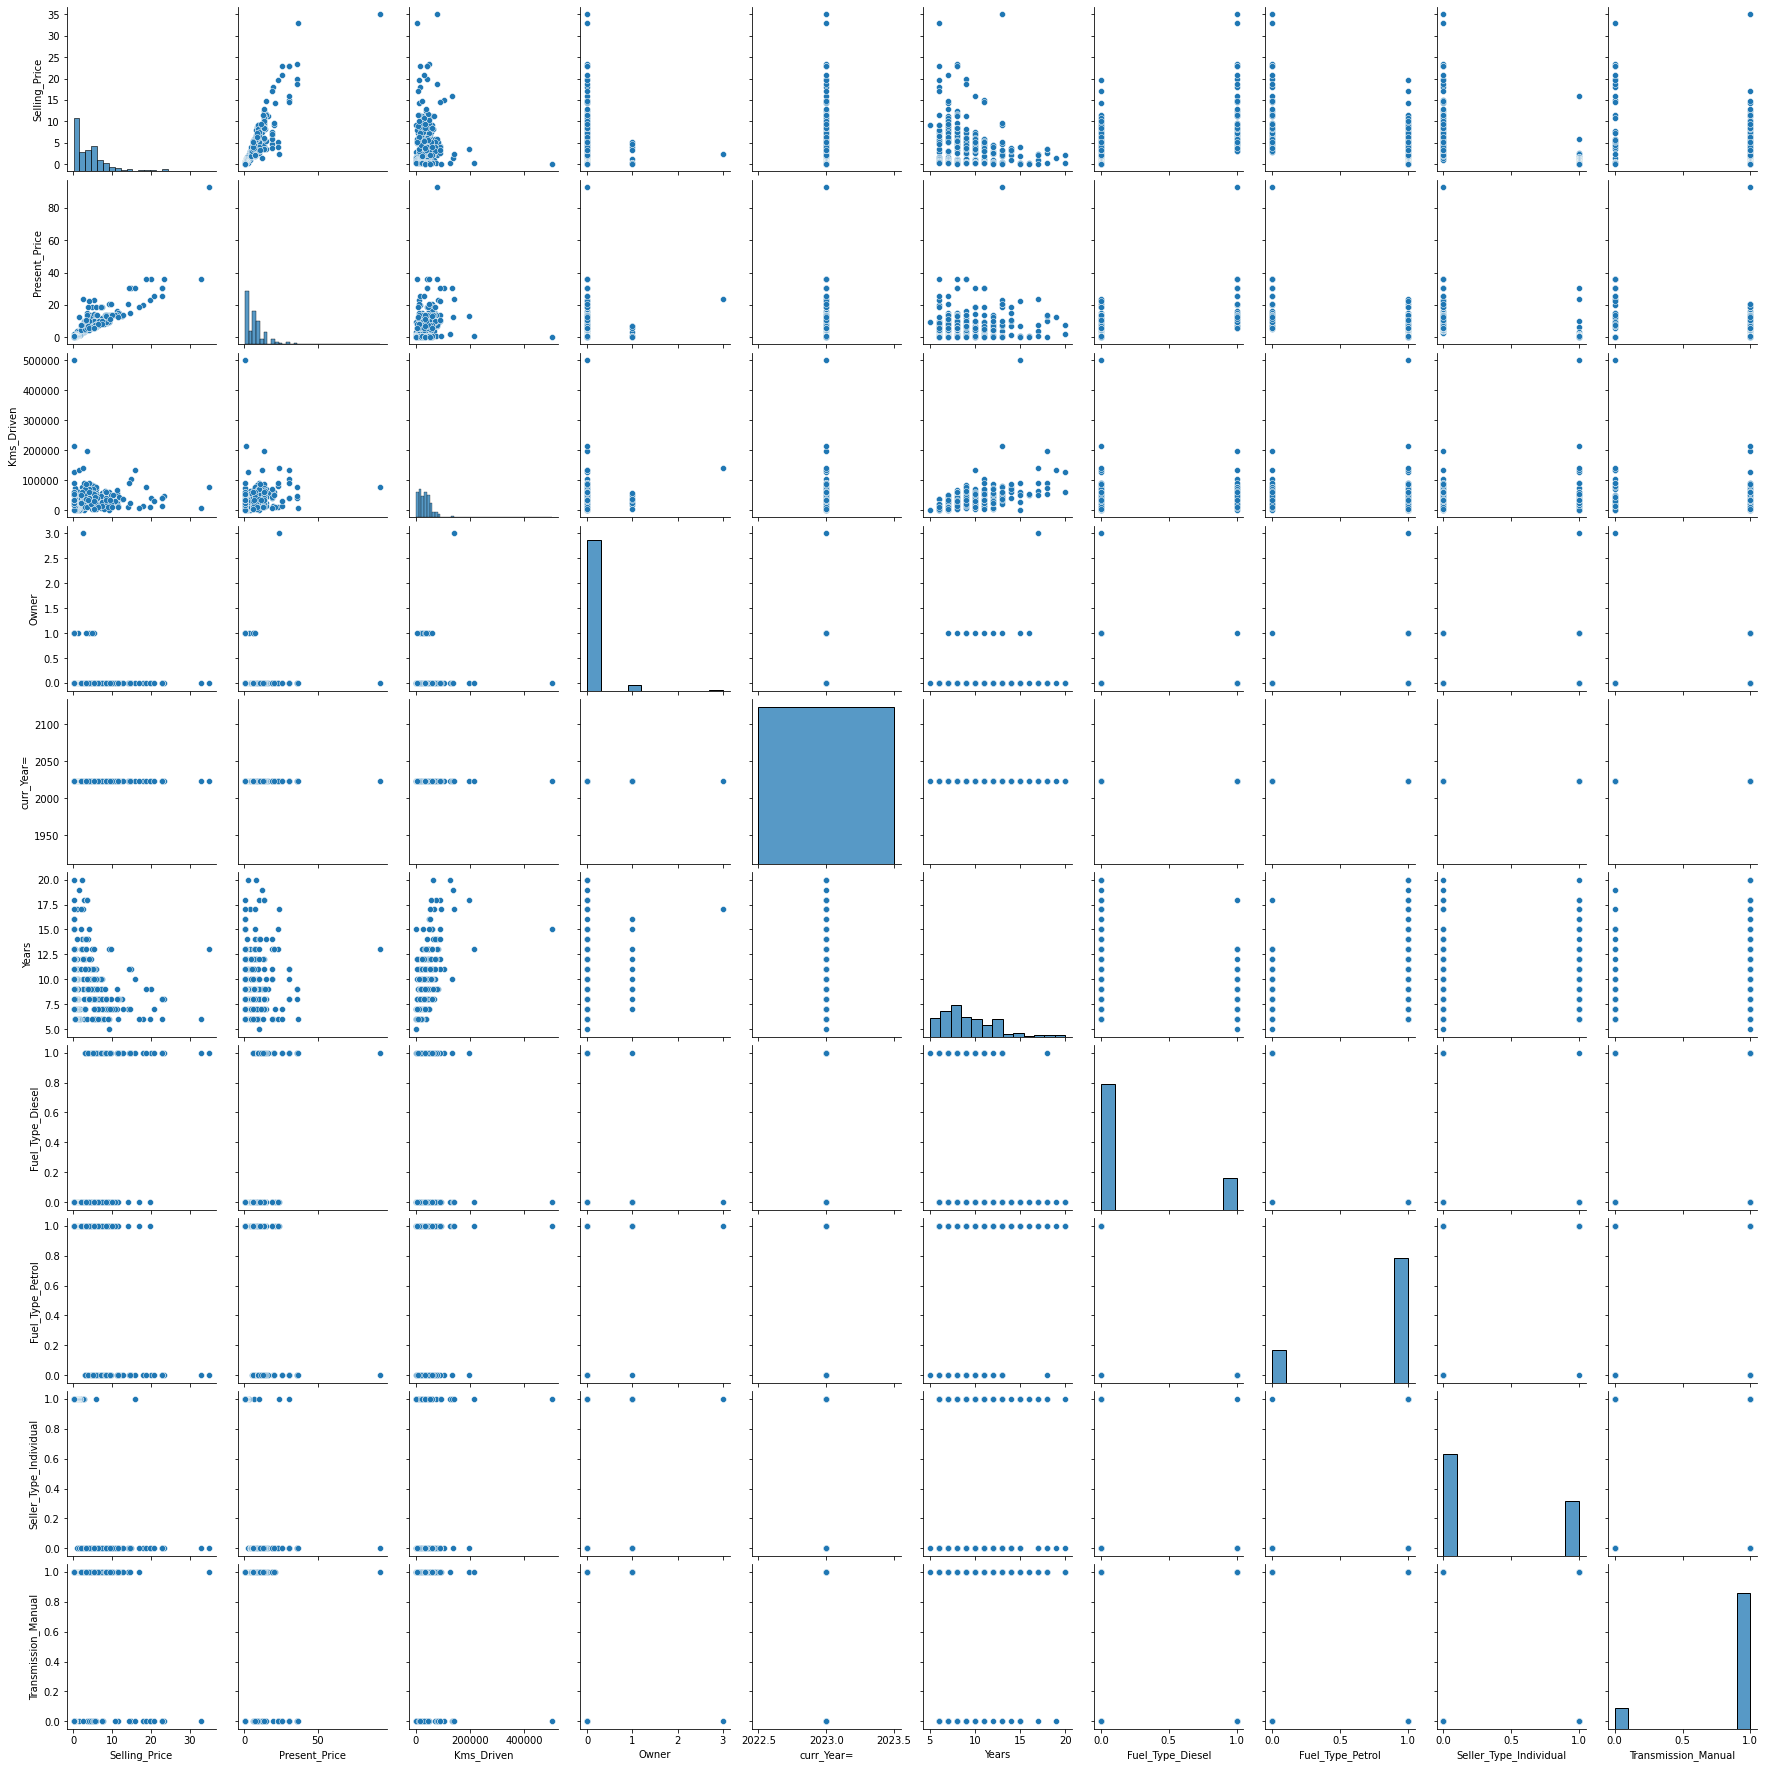

In [ ]:
sns.pairplot(data=df)

ploting correlation between dataset column by heatmap

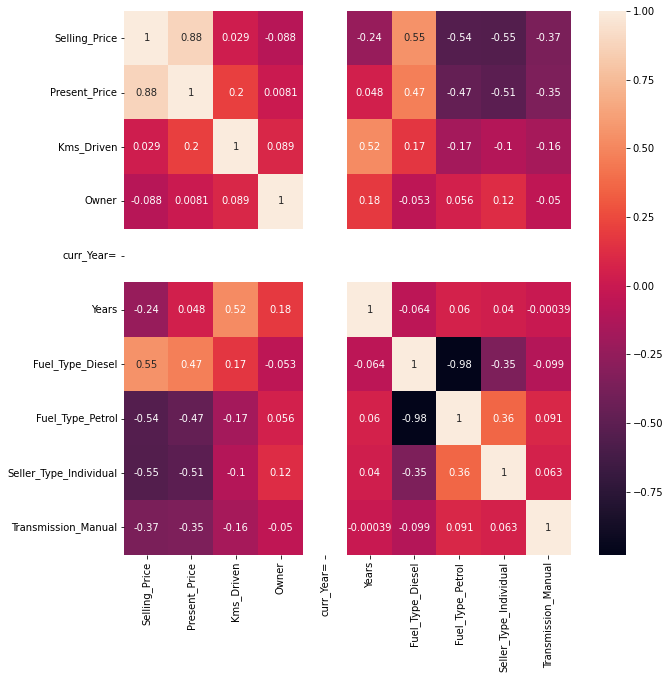

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

seperating depending and non dependant columns in different variables

In [ ]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
print(X.shape)
print(y.shape)

(301, 9)
(301,)


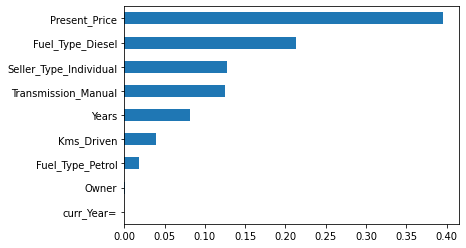

In [57]:
#ploting graph for correlation between dependent and independent column
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train[0])
print(X_test[0])

[0.00465973 0.05105105 0.33333333 0.         0.64285714 0.
 1.         1.         1.        ]
[0.00270915 0.04704705 0.         0.         0.07142857 0.
 1.         1.         0.        ]


In [60]:
#Logistic Regression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8489813024899069

In [61]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9112169048715978

In [62]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9598436297259734

In [67]:
#Hyperparameter tuning of RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
predictions=rf_random.predict(X_test)

Error calcuation

In [71]:


from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5725727868852434
MSE: 1.0990209599180292
RMSE: 1.048342005224454


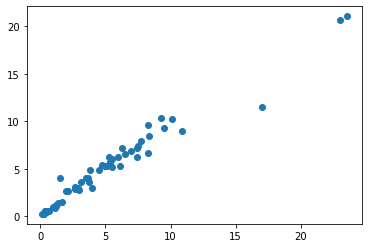

In [72]:
plt.scatter(y_test,predictions)